# Imports

In [41]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [42]:
import numpy as np
from src import *

%autoreload 2

# Signal

In [43]:
N = 8

# Sparse signal parameters
sparse_range = (-6, 6)
density = 0.005

# Smooth signal parameters
smooth_amplitude = 2
sigmas_range = (2e-2, 2e-1)
nb_gaussian = int(0.5 * N)

# Seed
seed = None

In [44]:
sparse_signal = compute_sparse(N, sparse_range, density, seed)
smooth_signal = compute_smooth(N, smooth_amplitude, sigmas_range, nb_gaussian, seed)

signal = sparse_signal + smooth_signal

plot_signal(sparse_signal, smooth_signal)

KeyboardInterrupt: 

# Operator $\phi$

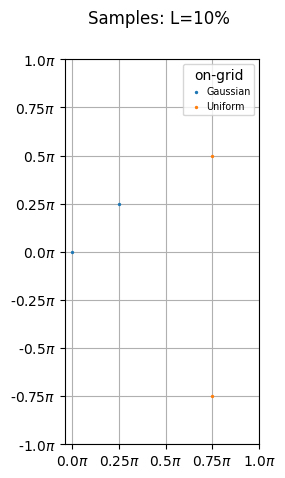

In [ ]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

x0 = signal.reshape(-1)
y0 = op(x0)

psnr = 50
y = compute_y(y0, psnr)

op.plot_samples()

# Solver

In [ ]:
from pyxu.operator import Laplacian

# Loss weights
lambda1 = 1e-2
lambda2 = 5e-2

coupled = False

x1, x2 = solve(y, op, lambda1, lambda2, coupled, Laplacian((op.N,op.N)))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pyxu/abc/arithmetic.py:639: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  t2 = float(self._op.apply(self._cst))


KeyboardInterrupt: 

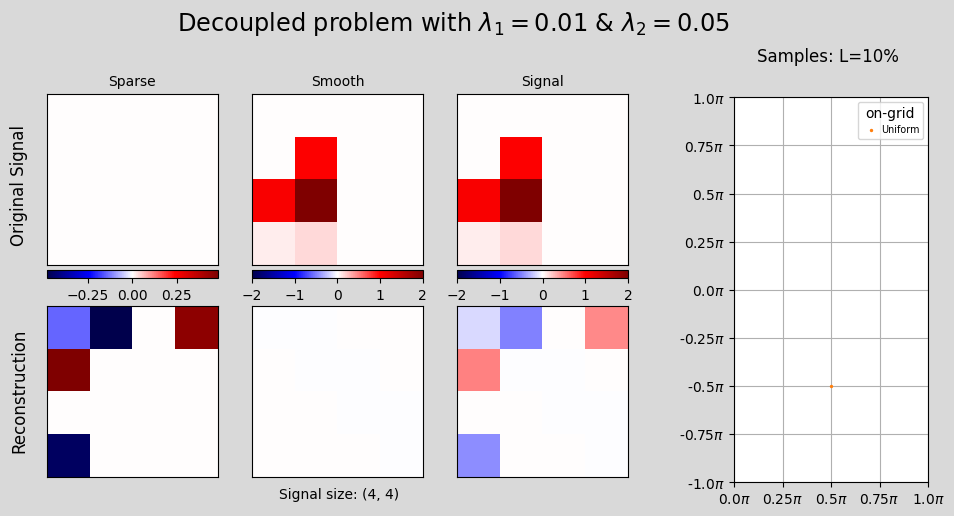

Button(description='SAVE', style=ButtonStyle())

Output()

In [ ]:
sparse_rcstr, smooth_rcstr, signal_rcstr = map(
    lambda x: x.reshape((N,N)), (x1, x2, x1 + x2)
)

fig = plot_results(
    [sparse_signal, smooth_signal],
    [sparse_rcstr, smooth_rcstr],
    lambda1,
    lambda2,
    op,
    coupled,
)

save_widget(fig, lambda1, lambda2, op, psnr, coupled)

True

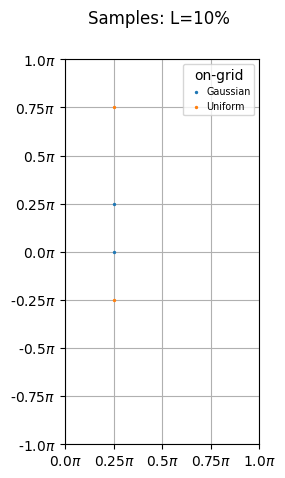

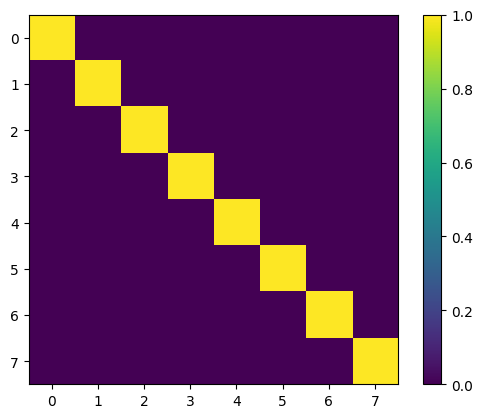

In [71]:
L = 0.1
theta = 0.5
op = NuFFT(N, L, theta, on_grid=True, seed=seed)

op.plot_samples()
plt.figure()
plt.imshow(2 / op.dim_in * op.phi.cogram().asarray())
# test sans cogram() mais avec phi.apply(phi.adjoint(...vecteur aléatoire...)) OK ça marche pas 
# + corriger demi-axe garder (0,0)  OK
# + ecrire code pour découplé avec L 
plt.colorbar()
np.allclose(
   2 / op.dim_in * op.phi.cogram().asarray(), np.eye(op.dim_out)
)  # vecteur aléatoire cogram().apply()

In [75]:
from pyxu.util import view_as_real, view_as_complex
from pyxu.operator import IdentityOp

v= np.random.rand(op.dim_out)

print(np.allclose(op.phi.cogram().apply(y),op.phi(op.phi.adjoint(y))))
((op.phi.cogram().apply(v) - (op.dim_in / 2) * v)/v).mean()


True


0.1499896230983948